In [1]:
# Ocean Heat Budget Analyses in the Antarctica continental shelf (WAOM)

# Fabio B Dias - 15 August 2023
# Description:
#     this script get the heat transport across 1500m calculate for individual experiments:
# WAOM10: WAOM10extend_shflim_S_0.25Q_Cross-1500m-Transport.ipynb
# WAOM4: WAOM4extend_shflim_S_0.25Q_Cross-1500m-Transport.py
# WAOM4-NOTIDE: WAOM4extend_shflim_S_0.25Q_notides_Cross-1500m-Transport.py
# WAOM2:
# and plot vertically-integrated analyses:
# 1) annual average


In [2]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

import gsw

import pyresample

from dask.distributed import Client

import warnings
warnings.filterwarnings('ignore')

In [3]:
tmp_files_dir = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/cross_contour_tmp/'

In [4]:
# determine constants:
rho0 = 1025 # kg. m-3
Cp = 3989.245 # J.kg-1.degC-1
Tf = -1.95 # degC


In [43]:
vol_transport_10km.shape

# define mean currents:
vol_transp_clim_10km = vol_transport_10km.mean('ocean_time')
                                               
vol_transp_clim_10km.shape


(31, 2588)

In [5]:
# load ice draft to create masks
expt = 'WAOM10'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily')
Tf_heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_5daily')
vol_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_5daily')
salt_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_5daily')
z_rho_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_10km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_10km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

In [6]:
%%time

expt = 'WAOM4'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily') # while waiting it to finish calc (9/8/23), calculate it from vol_transp
Tf_heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_5daily')
vol_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

##Tf_heat_transport_4km = vol_transport_4km*rho0*Cp*Tf

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_5daily')
salt_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + 'Zrho_1500m_daily') # replace for z_rho_1500m_5daily when it finishes (9/8/23)
# z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()
ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_1500m') 
z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_4km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_4km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

CPU times: user 57.2 ms, sys: 47.7 ms, total: 105 ms
Wall time: 842 ms


In [7]:
%%time
expt = 'WAOM4_notides'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily') # while waiting it to finish calc (9/8/23), calculate it from vol_transp
Tf_heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_5daily')
vol_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

##Tf_heat_transport_4kmNT = vol_transport_4kmNT*rho0*Cp*Tf

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_5daily')
salt_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_daily') # replace for z_rho_1500m_5daily when it finishes (9/8/23)
# z_rho_4kmNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m_daily')
# dist_along_4kmNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m_daily')
# lon_along_4kmNT = ds.variables["one"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m_daily')
# lat_along_4kmNT = ds.variables["two"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m_daily')
# distance_indicesNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

CPU times: user 40.7 ms, sys: 22.6 ms, total: 63.2 ms
Wall time: 536 ms


In [8]:
fig_path = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/'

# define along_contour axis with same length for both resolution:
[dist_along_axis_10km, Zaxis_10km] = np.meshgrid(dist_along_10km, np.arange(0,31))
[dist_along_axis_4km, Zaxis_4km] = np.meshgrid(dist_along_4km, np.arange(0,31))

NET_HT = (np.nanmean(np.sum(np.cumsum((heat_transport_10km-Tf_heat_transport_10km), axis=2), axis=1),axis=0))
ABS_HT =  (np.nanmean(np.sum(np.cumsum((heat_transport_10km), axis=2), axis=1),axis=0))
TF_HT = (np.nanmean(np.sum(np.cumsum((Tf_heat_transport_10km), axis=2), axis=1),axis=0))
NET_HT_4km = (np.nanmean(np.sum(np.cumsum((heat_transport_4km-Tf_heat_transport_4km), axis=2), axis=1),axis=0))
ABS_HT_4km =  (np.nanmean(np.sum(np.cumsum((heat_transport_4km), axis=2), axis=1),axis=0))
TF_HT_4km = (np.nanmean(np.sum(np.cumsum((Tf_heat_transport_4km), axis=2), axis=1),axis=0))
NET_HT_4kmNT = (np.nanmean(np.sum(np.cumsum((heat_transport_4kmNT-Tf_heat_transport_4kmNT), axis=2), axis=1),axis=0))
ABS_HT_4kmNT =  (np.nanmean(np.sum(np.cumsum((heat_transport_4kmNT), axis=2), axis=1),axis=0))
TF_HT_4kmNT = (np.nanmean(np.sum(np.cumsum((Tf_heat_transport_4kmNT), axis=2), axis=1),axis=0))


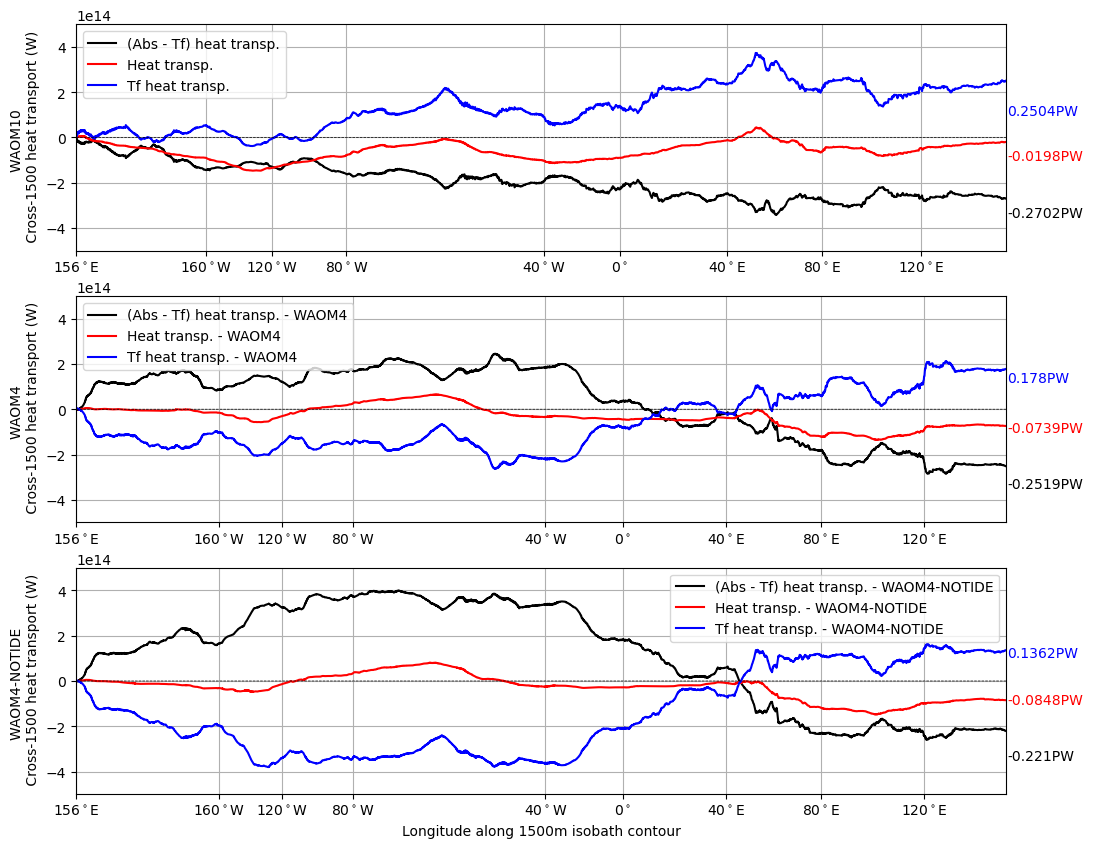

In [38]:
# plot with vertically integrated cross-1500m HT: WAOM10 vs WAOM4/4NT

fig, ax = plt.subplots(nrows=3, figsize = (12, 10))
ax[0].plot(dist_along_10km,NET_HT, '-k', label='(Abs - Tf) heat transp.') 
ax[0].plot(dist_along_10km,ABS_HT, '-r', label='Heat transp.') 
ax[0].plot(dist_along_10km,TF_HT, '-b', label='Tf heat transp.') 
ax[0].text(20.8,1e14,str(np.round(TF_HT[-1]*1e-15,decimals=4)) + 'PW', color='b')
ax[0].text(20.8,-1e14,str(np.round(ABS_HT[-1]*1e-15,decimals=4)) + 'PW', color='r')
ax[0].text(20.8,-3.5e14,str(np.round(NET_HT[-1]*1e-15,decimals=4)) + 'PW', color='k')

ax[0].plot(dist_along_10km,dist_along_10km*0, '--k', linewidth=0.5) 
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])
ax[0].set_ylim(-5e14, 5e14)
ax[0].set_ylabel('WAOM10 \n Cross-1500 heat transport (W)')
ax[0].legend()
ax[0].grid()

ax[1].plot(dist_along_4km,NET_HT_4km, '-k', label='(Abs - Tf) heat transp. - WAOM4') 
ax[1].plot(dist_along_4km,ABS_HT_4km, '-r', label='Heat transp. - WAOM4') 
ax[1].plot(dist_along_4km,TF_HT_4km, '-b', label='Tf heat transp. - WAOM4') 
ax[1].text(22.2,1.2e14,str(np.round(TF_HT_4km[-1]*1e-15,decimals=4)) + 'PW', color='b')
ax[1].text(22.2,-1e14,str(np.round(ABS_HT_4km[-1]*1e-15,decimals=4)) + 'PW', color='r')
ax[1].text(22.2,-3.5e14,str(np.round(NET_HT_4km[-1]*1e-15,decimals=4)) + 'PW', color='k')

ax[1].plot(dist_along_4km,dist_along_4km*0, '--k', linewidth=0.5) 
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])
ax[1].set_ylim(-5e14, 5e14)
ax[1].set_ylabel('WAOM4 \n Cross-1500 heat transport (W)')
ax[1].legend()
ax[1].grid()

ax[2].plot(dist_along_4km,NET_HT_4kmNT, '-k', label='(Abs - Tf) heat transp. - WAOM4-NOTIDE') 
ax[2].plot(dist_along_4km,ABS_HT_4kmNT, '-r', label='Heat transp. - WAOM4-NOTIDE') 
ax[2].plot(dist_along_4km,TF_HT_4kmNT, '-b', label='Tf heat transp. - WAOM4-NOTIDE') 

ax[2].text(22.2,1.05e14,str(np.round(TF_HT_4kmNT[-1]*1e-15,decimals=4)) + 'PW', color='b')
ax[2].text(22.2,-1e14,str(np.round(ABS_HT_4kmNT[-1]*1e-15,decimals=4)) + 'PW', color='r')
ax[2].text(22.2,-3.5e14,str(np.round(NET_HT_4kmNT[-1]*1e-15,decimals=4)) + 'PW', color='k')

ax[2].plot(dist_along_4km,dist_along_4km*0, '--k', linewidth=0.5) 
ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_4km[-1])
ax[2].set_ylim(-5e14, 5e14)
ax[2].set_ylabel('WAOM4-NOTIDE \n Cross-1500 heat transport (W)')
ax[2].set_xlabel('Longitude along 1500m isobath contour')
ax[2].legend()
ax[2].grid()

name_fig='WAOM10x4x4NT_Cross-1500m_CumTransport_vint2.png'
plt.savefig(fig_path + name_fig, dpi=300)

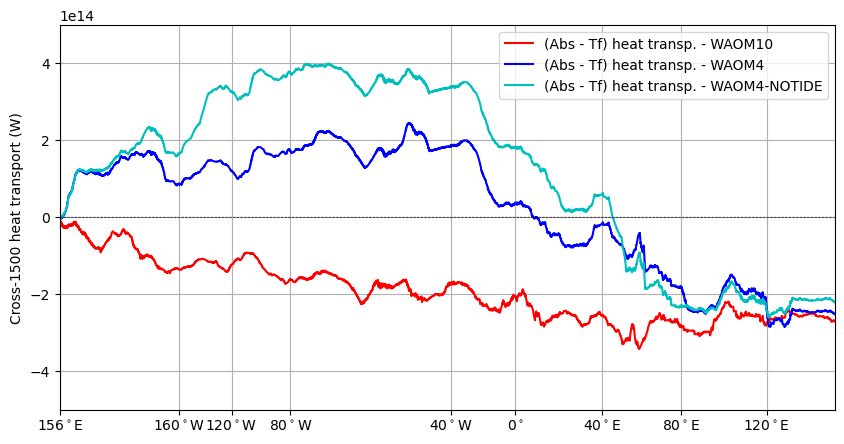

In [27]:
# plot with vertically integrated cross-1500m HT: WAOM10 vs WAOM4/4NT

# HOW TO PUT BOTH 10 AND 4KM IN THE SAME X-AXIS????
# R: interpolating dist_along_10km to 4km limits:
dist_along_10km_interp = np.linspace(dist_along_4km[0], dist_along_4km[-1], num=len(dist_along_10km))


fig, ax = plt.subplots(nrows=1, figsize = (10, 5))
ax.plot(dist_along_10km_interp,NET_HT, '-r', label='(Abs - Tf) heat transp. - WAOM10') 
ax.plot(dist_along_4km,NET_HT_4km, '-b', label='(Abs - Tf) heat transp. - WAOM4') 
ax.plot(dist_along_4km,NET_HT_4kmNT, '-c', label='(Abs - Tf) heat transp. - WAOM4-NOTIDE') 
ax.plot(dist_along_10km_interp,dist_along_10km*0, '--k', linewidth=0.5) 

ax.set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax.set_xlim(0, dist_along_4km[-1])

ax.set_ylim(-5e14, 5e14)
ax.set_ylabel('Cross-1500 heat transport (W)')
ax.legend()
ax.grid()

name_fig='WAOM10x4x4NT_Cross-1500m_CumTransport_vint.png'
plt.savefig(fig_path + name_fig, dpi=300)

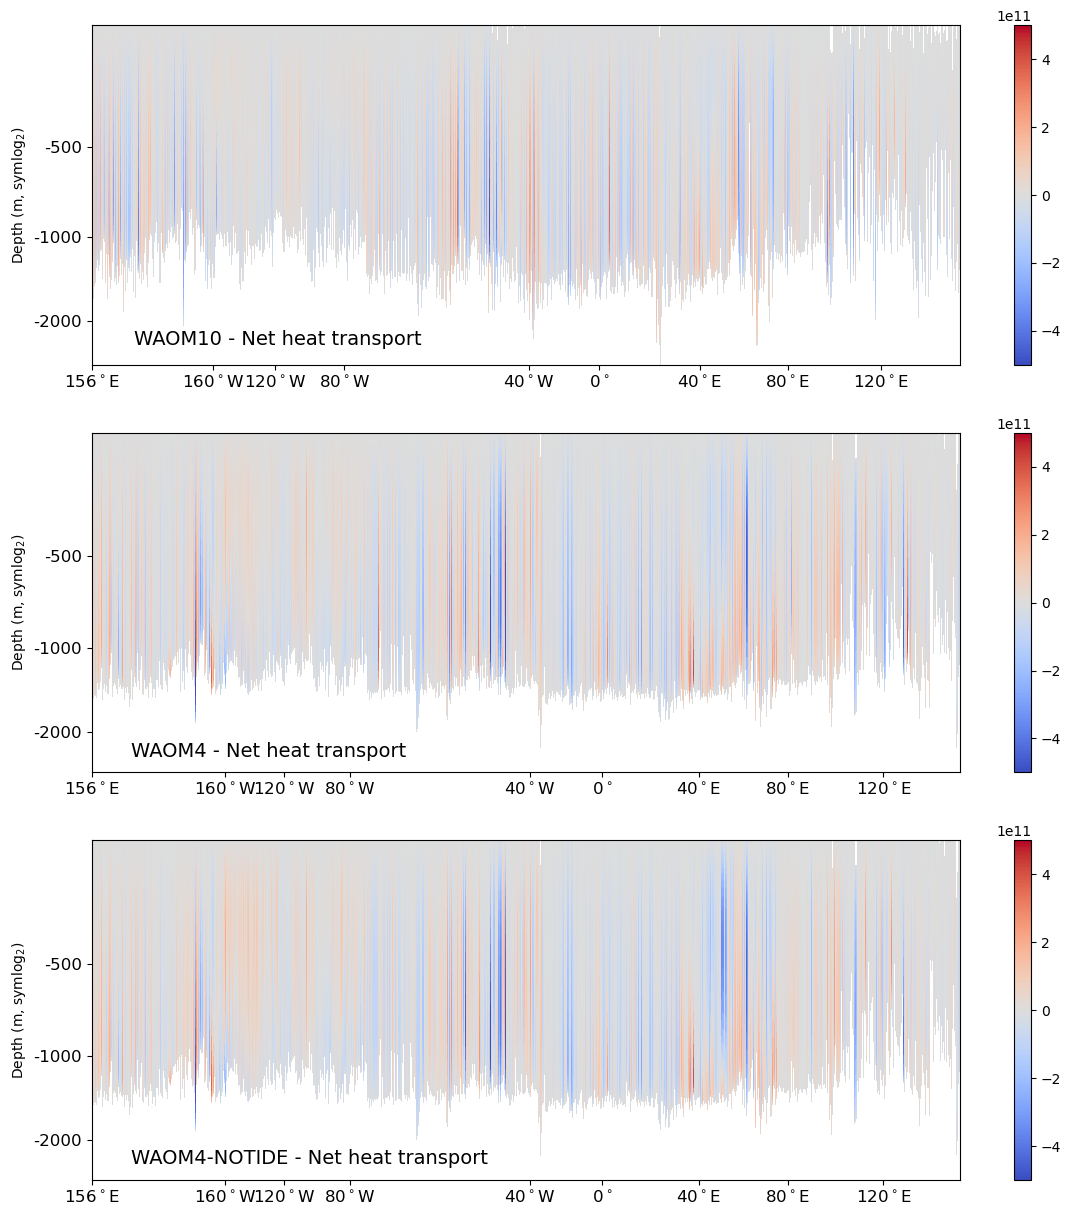

In [13]:
# plot section with discretised depths:

# THESE NEED TO BE WEIGHTED BY SPECIFIC MODEL AREA - OTHERWISE MAGNITUDES ARE NOT COMPARABLE ACROSS RESOLUTIONS!
# NB: CURRENTLY DIVIDING 10KM BY 2.5 FACTOR, see below:


fig, ax = plt.subplots(nrows=3, figsize = (14, 15))
tt=30
cht = ax[0].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.divide(np.nanmean((heat_transport_10km-Tf_heat_transport_10km), axis=0),2.5), cmap='coolwarm', vmin=-.5e12 , vmax=.5e12)#
fig.colorbar(cht, ax=ax[0])
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])
ax[0].text(1,-2500,'WAOM10 - Net heat transport',fontsize=14)
ax[0].set_yscale('symlog',base = 2, linthresh=700)
ax[0].set_ylabel('Depth (m, symlog$_2$)')
ax[0].set_yticklabels(['-2000','-1000','-500'])
ax[0].set_aspect('auto')
ax[0].tick_params(labelsize=12)

cht = ax[1].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean((heat_transport_4km-Tf_heat_transport_4km), axis=0), cmap='coolwarm', vmin=-.5e12 , vmax=.5e12)#
fig.colorbar(cht, ax=ax[1])
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])
ax[1].text(1,-2500,'WAOM4 - Net heat transport',fontsize=14)
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)

cht = ax[2].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean((heat_transport_4kmNT-Tf_heat_transport_4kmNT), axis=0), cmap='coolwarm', vmin=-.5e12 , vmax=.5e12)#
fig.colorbar(cht, ax=ax[2])
ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_4km[-1])
ax[2].text(1,-2500,'WAOM4-NOTIDE - Net heat transport',fontsize=14)
ax[2].set_yscale('symlog',base = 2, linthresh=700)
ax[2].set_ylabel('Depth (m, symlog$_2$)')
ax[2].set_yticklabels(['-2000','-1000','-500'])
ax[2].set_aspect('auto')
ax[2].tick_params(labelsize=12)

name_fig='WAOM10x4x4NT_Cross-1500m_NetHeatTransport.png'
plt.savefig(fig_path + name_fig, dpi=300)